In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

colores = {'SOS': 'black', 'MOS': 'black', 'EOS': 'black'}
markers = {'SOS': '>', 'MOS': 'D', 'EOS': '<'} #En principio no se va a usar

def FC(datos, indice):
    
    data = pd.read_excel(datos, sheetname='datos')
    data = data.round(2)
    data = data.set_index(indice)
    days = pd.read_excel(datos, sheetname='dias')
    days = days.set_index('Parametro')
    #Probamos hacer una lista de colores para poder invertirla
    #No hay que invertir, se usa counterclock=False!
    
    subgroup_names=[i for i in range(len(data[data.columns[0]]))]
    subgroup_size= len(data[data.columns[0]])*[10]
    months_size = 12*[30]
    month_names=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

    #Rampa de colores, Quizas quedaria mejor una personalizada y que fuera desde -1 hasta 1 (por si incluye agua)
    c = plt.cm.Greens

    fig, ax = plt.subplots(figsize=(20, 20))
    #plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
    ax.axis('equal')

    r = 1
    rlist = []
    
    #cambiados para ver como queda
    minimo = min(data.min()) - 0.25
    maximo = max(data.max()) 
    norm = mpl.colors.Normalize(vmin=minimo,vmax=maximo)
    
    #Anillo con los valores para cada fecha o especie
    for i in data.columns:
               
        mypie, _ = ax.pie(subgroup_size, radius=r, startangle=90, counterclock=False,
                           colors = [c(norm(n)) for n in data[i]]) #[c[str(n)] for n in data[i]][::-1])
        plt.setp(mypie, width=0.1, edgecolor='none')
        plt.margins(0,0)
        
        #Empezamos a plotear los seasonsdays
        for ix in days[i].index:
    
            val = days.get_value(ix, i)
            index = ix
            color = colores[index]
            
            if index == 'SOS':
                marker=(3, 0, (90 - val)-180)
                inicenter = ((r-0.05)*math.cos((90-(val+0.7))/180.0*math.pi))
                endcenter = ((r-0.05)*math.sin((90-(val+0.7))/180.0*math.pi))
            elif index == 'MOS':
                marker=(4, 0, (90-val))
                inicenter = ((r-0.05)*math.cos((90-val)/180.0*math.pi))
                endcenter = ((r-0.05)*math.sin((90-val)/180.0*math.pi))
            elif index == 'EOS':
                marker=(3, 0, ((90-val)))
                inicenter = ((r-0.05)*math.cos((90-(val-0.5))/180.0*math.pi))
                endcenter = ((r-0.05)*math.sin((90-(val-0.5))/180.0*math.pi))
                
            #marker = markers[index] Si se fuera a usar el diccionario de marcadores
            
            inipoint = ((r-0.1)*math.cos((90-val)/180.0*math.pi))
            end = ((r-0.1)*math.sin((90-val)/180.0*math.pi))
            #Lineas de seasonsdays
            ax.plot((inipoint, r*math.cos((90-val)/180.0*math.pi)), (end, r*math.sin((90-val)/180.0*math.pi)), lw=3, c='black')
            #Marcadores de seasonsdays
            ax.plot(inicenter, endcenter, marker=marker, color=colores[index], ms=13)
            
        rlist.append('{:1f}'.format(r))
        r+=0.1

        #Circulos de contorno de cada especie o fecha
        circle = plt.Circle((0, 0), r-0.2, color='black', lw=0.5, fill=False)
        ax.add_artist(circle)
         
    
    circle2 = plt.Circle((0, 0), r-0.1, color='black', lw=1, fill=False)
    ax.add_artist(circle2)
    
    #Circulo externo con los meses del año
    mypie7, _ = ax.pie(months_size, radius=float(max(rlist)), startangle=90, labels=month_names, counterclock=False, 
                   colors=['none', 'none', 'none'])
    plt.setp( mypie7, width=len(rlist)/10, edgecolor='black', lw=1)
    plt.margins(0,0)      
    
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    
    ax_cb = fig.add_axes([.9,.25,.015,.25])
    b2 = [round(i,2) for i in np.linspace(minimo, maximo, 5)]
    cb = mpl.colorbar.ColorbarBase(ax_cb, norm=norm, cmap=c, ticks=b2)
    cb.ax.yaxis.set_label_position(position='left')
    cb.ax.set_alpha(.5)
    cb.set_label('NDVI Values')
    
    #print(rlist)
    plt.savefig(r'C:/Users/Diego/Desktop/CursosLAST/phenologyGraph.jpg', dpi=400)
    return plt.show()

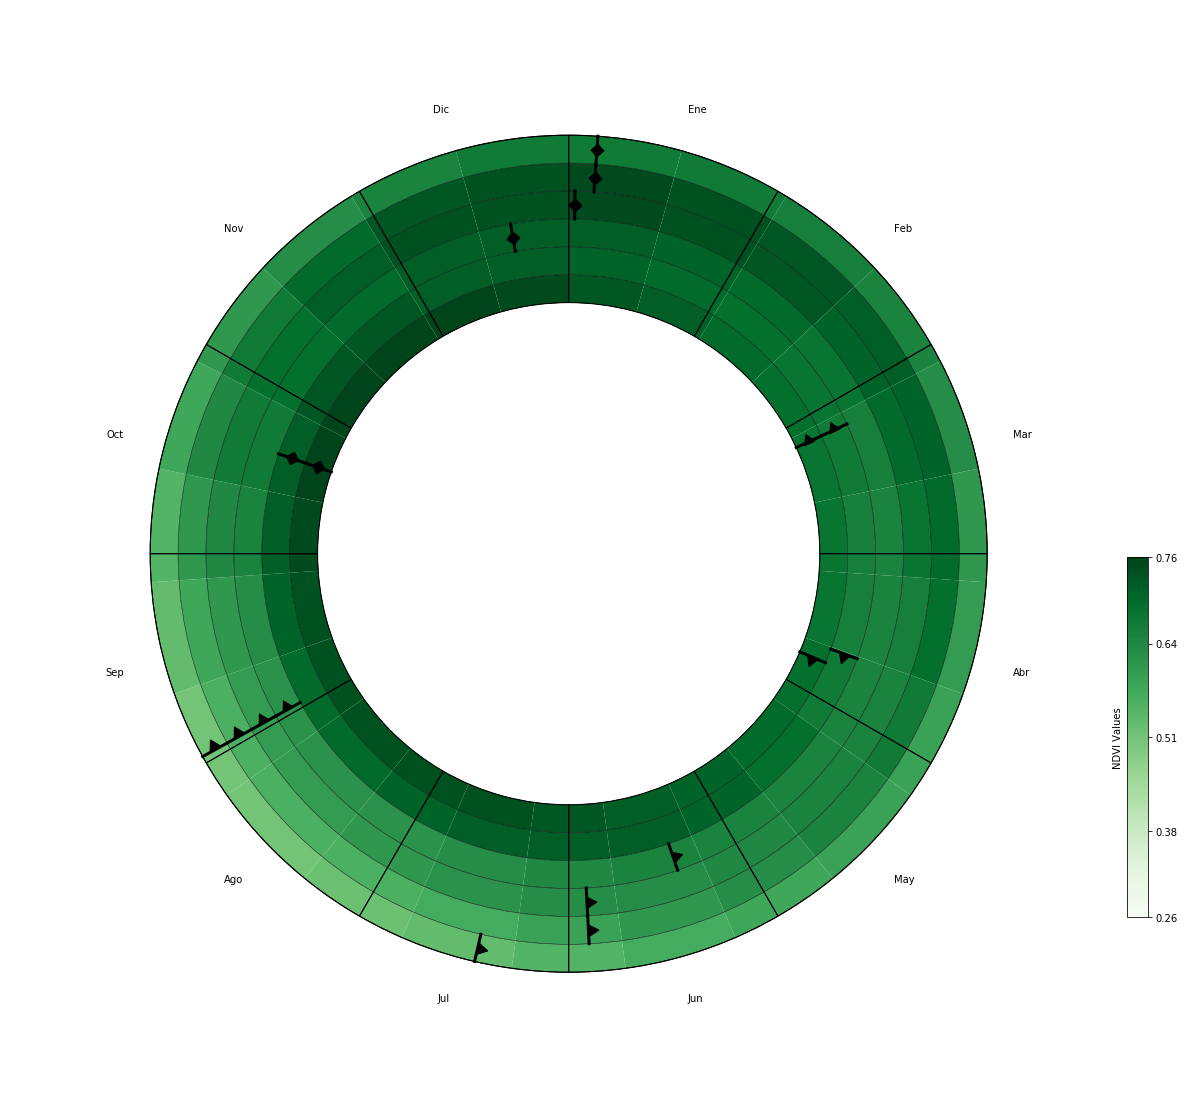

In [2]:
FC(r'C:\Users\Diego\Desktop\circleplot_fin2.xlsx', 'doy')

In [33]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

colores = {'sos': 'white', 'mos': 'red', 'eos': 'black'}
#Diccionario con la rampa de color
aa = np.load('my_cmap.npy').item()
aa[0] = 'none'

def FC(datos, indice):
    
    data = pd.read_excel(datos, sheetname='datos')
    data = data.round(2)
    data = data.set_index(['año', 'doy'])
    data = data.fillna(0)
    years = data.index.levels[0].tolist()
    days = pd.read_excel(datos, sheetname='dias')
    days = days.set_index(['especie', 'año'])
    #Probamos hacer una lista de colores para poder invertirla
    #No hay que invertir, se usa counterclock=False!
    
    subgroup_names=[i for i in range(len(data[data.columns[0]]))]
       
    months_size = 12*[30]
    month_names=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

    #Rampa de colores, Quizas quedaria mejor una personalizada y que fuera desde -1 hasta 1 (por si incluye agua)
    c = plt.cm.RdYlGn

    fig, ax = plt.subplots(figsize=(15, 15))
    #plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
    ax.axis('equal')
    
    offset = 0.8
    off = np.linspace(0.6, 0.9, 6)
    k = 0
    r = 0.3
    rlist = []
    
    #cambiados para ver como queda
    minimo = min(data.min())
    maximo = max(data.max()) 
    norm = mpl.colors.Normalize(vmin=minimo,vmax=maximo)
    
    #Anillo con los valores para cada fecha o especie
    
    #entramos en la especie
    for i in data.columns:
        
        for y in years:
            
            offset -= 0.05
            vals = []
            ndata = data[i].loc[y]
            subgroup_size= len(ndata)*[10]
            
            mypie, _ = ax.pie(subgroup_size, radius=r, startangle=90, counterclock=False,
                               colors = [aa[int(n*100)] for n in ndata]) #[aa[int(n*100)] for n in ndata])
                              #[c(norm(n)) for n in ndata]) #[c[str(n)] for n in data[i]][::-1])
            plt.setp(mypie, width=0.05, edgecolor='none')
            plt.margins(0,0)

        
            rlist.append('{:1f}'.format(r))
            #r+=0.05
            #print(rlist)

           #Circulos de contorno de cada fecha
            #circle = plt.Circle((0, 0), r-0.05, color='black', lw=0.25, fill=False)
            #ax.add_artist(circle)
            
            gs = [30]
            
            if i != 'P. pinaster':
                gn = ['']
            else:
                gn = [y]
            
            plt.rcParams['text.color'] = 'antiquewhite'
            plt.rcParams['font.size'] = 3.5
            
            mypie15, _ = ax.pie(gs, radius=r, startangle=271,   #250,
                           labels=gn, labeldistance=0.9925, colors=['none'])
            plt.setp(mypie15, width=0.05, edgecolor='black', lw=0.1)

            plt.margins(0,0)
        
            #print('Otra Especie:', i)
            #print('Finalizada especie', i)

            #Empezamos a plotear los SEASONDAYS
            #Asi es como seleccionamos cada fecha-especie: days.loc['P. sylvestris', 2001]['SOS']
            sos = days.loc[i, y]['SOS']
            mos = days.loc[i, y]['MOS']
            eos = days.loc[i, y]['EOS']
            
            markers=(3, 0, (90 - sos)-180)
            inicenter = ((r-0.025)*math.cos((90-(sos+offset))/180.0*math.pi))
            endcenter = ((r-0.025)*math.sin((90-(sos+offset))/180.0*math.pi))
            #PLOT
            #ax.plot(inicenter, endcenter, marker=markers, color=colores['sos'], ms=3)
            #SCATTER
            a = ax.scatter(inicenter, endcenter, marker=markers, color=colores['sos'], zorder=10, s=25)
            inipoint = ((r-0.05)*math.cos((90-sos)/180.0*math.pi))
            end = ((r-0.05)*math.sin((90-sos)/180.0*math.pi))
            #ax.plot((inipoint, r*math.cos((90-sos)/180.0*math.pi)), (end, r*math.sin((90-sos)/180.0*math.pi)), 
                    #lw=2, c=colores['sos'])
            
            markerm=(4, 0, (90-mos))
            inicenter = ((r-0.025)*math.cos((90-mos)/180.0*math.pi))
            endcenter = ((r-0.025)*math.sin((90-mos)/180.0*math.pi))
            #PLOT
            #ax.plot(inicenter, endcenter, marker=markerm, color=colores['mos'], ms=3)
            #SCATTER
            b = ax.scatter(inicenter, endcenter, marker=markerm, color=colores['mos'], zorder=10, s=25)
            inipoint = ((r-0.05)*math.cos((90-mos)/180.0*math.pi))
            end = ((r-0.05)*math.sin((90-mos)/180.0*math.pi))
            #ax.plot((inipoint, r*math.cos((90-mos)/180.0*math.pi)), (end, r*math.sin((90-mos)/180.0*math.pi)), 
                    #lw=2, c=colores['mos'])
            
            markere=(3, 0, (90-eos)) #-180)
            inicenter = ((r-0.025)*math.cos((90-(eos-0.5))/180.0*math.pi))
            endcenter = ((r-0.025)*math.sin((90-(eos-0.5))/180.0*math.pi))
            #PLOT
            #ax.plot(inicenter, endcenter, marker=markere, color=colores['eos'], ms=3)
            #SCATTER
            c = ax.scatter(inicenter, endcenter, marker=markere, color=colores['eos'], zorder=10, s=25)
            inipoint = ((r-0.05)*math.cos((90-eos)/180.0*math.pi))
            end = ((r-0.05)*math.sin((90-eos)/180.0*math.pi))
            #ax.plot((inipoint, r*math.cos((90-eos)/180.0*math.pi)), (end, r*math.sin((90-eos)/180.0*math.pi)), 
                    #lw=2, c=colores['eos'])
            
            #plt.rcParams('legend.') # using a size in points
            
            r+=0.05
            #marker = markers[index] Si se fuera a usar el diccionario de marcadores
            
                
            #inipoint = ((r-0.05)*math.cos((90-p)/180.0*math.pi))
            #end = ((r-0.05)*math.sin((90-p)/180.0*math.pi))
            #Lineas de seasonsdays
            #ax.plot((inipoint, r*math.cos((90-p)/180.0*math.pi)), (end, r*math.sin((90-p)/180.0*math.pi)), 
                    #lw=1, c='black')
            #Marcadores de seasonsdays
            #ax.plot(inicenter, endcenter, marker=markerm, color=colores['mos'], ms=.7)
            
        #Circulo para cada especie
        #circle = plt.Circle((0, 0), radius=r-0.05, color='black', lw=1.5, fill=False)
        #ax.add_artist(circle)
        
        # Second Ring (Inside)
        group_names=[i]
        group_size=[120]
        
        plt.rcParams['text.color'] = 'antiquewhite'
        plt.rcParams['font.size'] = 9
        plt.rcParams['font.style'] = 'italic'
        plt.rcParams['font.weight'] = 'bold'
               
        
        mypie2, _ = ax.pie(group_size, radius=r-0.05, startangle=55,   #250,
                           labels=group_names, labeldistance= off[k], colors=['none'])
        plt.setp(mypie2, width=0.75, edgecolor='black', lw=1)
        
        plt.margins(0,0)
        k+=1
        
            #circle2 = plt.Circle((0, 0), 0.2, color='red', lw=2, fill=False)
            #ax.add_artist(circle2)

    #Circulo externo con los meses del año
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['font.size'] = 18
    plt.rcParams['font.weight'] = 'normal'
    plt.rcParams['font.style'] = 'normal'
    
    mypie7, _ = ax.pie(months_size, radius=float(max(rlist)), startangle=90, labels=month_names, counterclock=False, 
                   colors=['none', 'none', 'none'])
    plt.setp( mypie7, width=0.05*90, edgecolor='black', lw=2)
    
    plt.margins(0,0)      

    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    
    plt.rcParams['font.size'] = 8
    
    legend = plt.legend([a, b, c], ["SOS", "MOS", "EOS"], fancybox=True, framealpha=1, labelspacing=1, title='Pheno Days',
                       shadow=True, borderpad=1, loc='upper left')
    frame = legend.get_frame()
    frame.set_color('orange')
    
    cmm = [i for i in aa.values()]
    mcmap = mpl.colors.ListedColormap(cmm)
    ax_cb = fig.add_axes([0.95,.15,.015,.2])
    b2 = [round(i,2) for i in np.linspace(minimo, maximo, 5)]
    b2Nonorm = [round(i,2) for i in np.linspace(0, 1, 5)]
    cb = mpl.colorbar.ColorbarBase(ax_cb, cmap=mcmap, ticks=b2Nonorm) #norm=norm, 
    cb.ax.yaxis.set_label_position(position='left')
    cb.ax.set_alpha(.5)
   
    cb.set_label('NDVI Values')

    #print(rlist)
    plt.savefig(r'C:/Users/Diego/Desktop/CursosLAST/phenologyGraphBig_tst2.jpg', dpi=400)
    return plt.show()

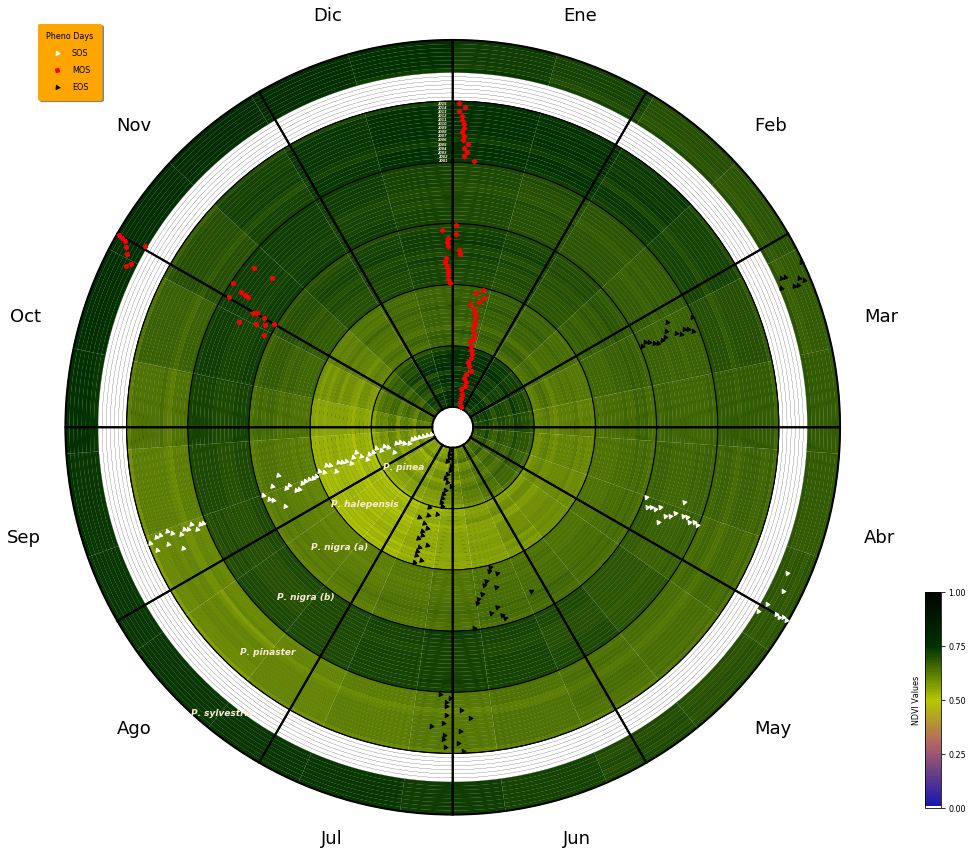

In [34]:
FC(r'C:/Users/Diego/Desktop/CursosLAST/datostest2.xlsx', 'doy')

In [21]:
import pandas as pd


data = pd.read_excel(r'C:/Users/Diego/Desktop/CursosLAST/datostest2.xlsx', sheetname='datos')
#dias = pd.read_excel(r'C:/Users/Diego/Desktop/CursosLAST/datoscompletos.xlsx', sheetname='dias')
data = data.round(2)

data = data.set_index(['año', 'doy'])
data = data.fillna(0)
data.head()

P. pinea  P. halepensis  P. nigra (a)  P. nigra (b)  P. pinaster  \
año  doy                                                                     
2001 4        0.71           0.65          0.71          0.71         0.74   
     17       0.71           0.65          0.70          0.70         0.73   
     33       0.70           0.64          0.69          0.69         0.72   
     49       0.71           0.63          0.67          0.68         0.71   
     65       0.70           0.61          0.66          0.67         0.70   

          P. sylvestris  
año  doy                 
2001 4              0.0  
     17             0.0  
     33             0.0  
     49             0.0  
     65             0.0

C:\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


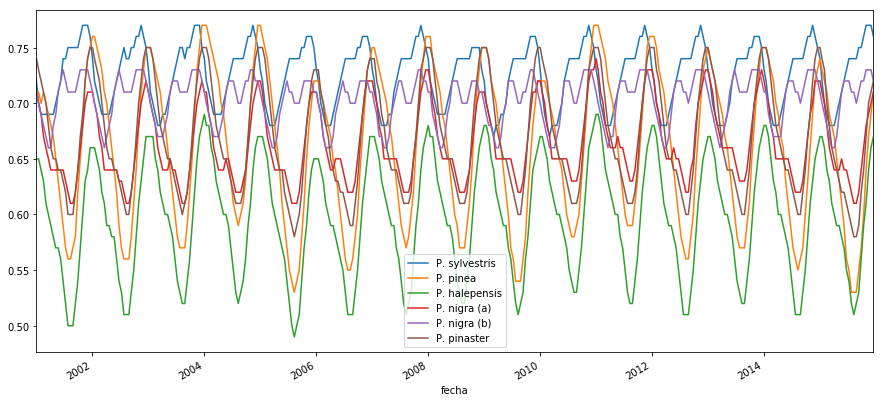

In [403]:
%matplotlib inline

data.plot(figsize=(15,7))

In [409]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

y = data.resample('MS').mean()

C:\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


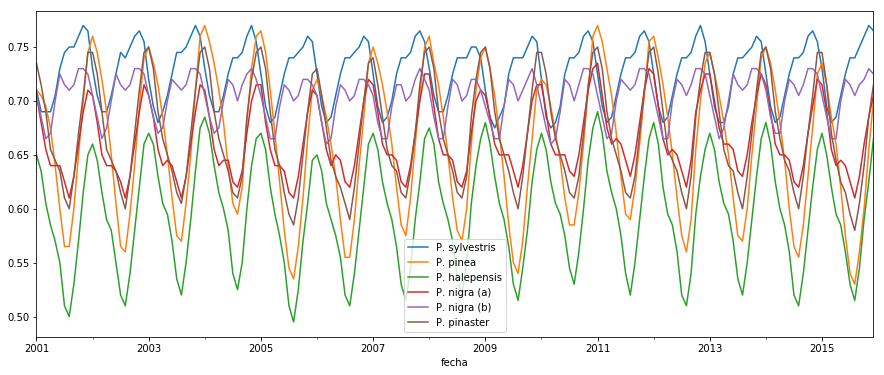

In [410]:
y.plot(figsize=(15, 6))
plt.show()

In [414]:
y.columns

Index(['P. sylvestris', 'P. pinea', 'P. halepensis', 'P. nigra (a)',
       'P. nigra (b)', 'P. pinaster'],
      dtype='object')

P. sylvestris


C:\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


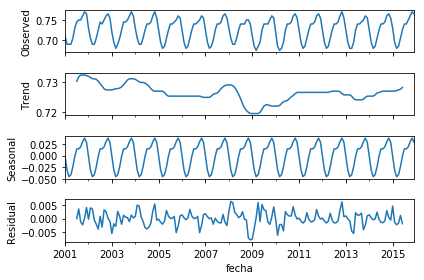

P. pinea


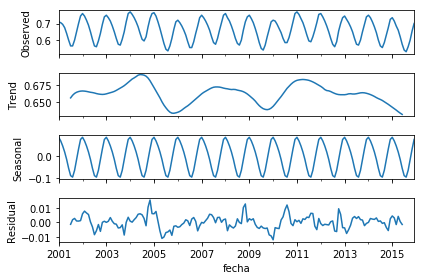

P. halepensis


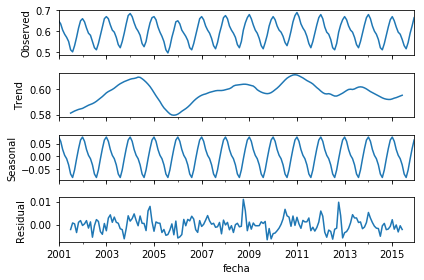

P. nigra (a)


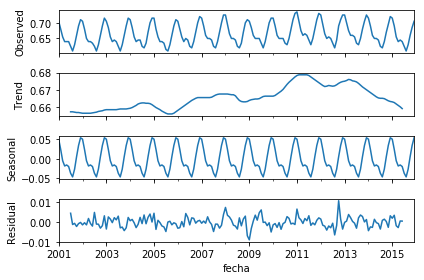

P. nigra (b)


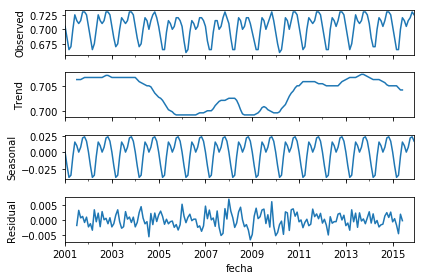

P. pinaster


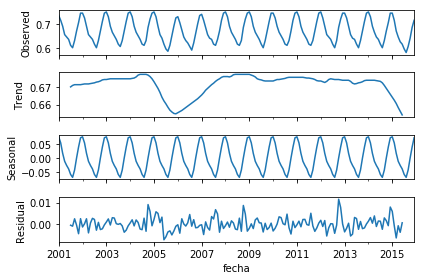

In [416]:
for i in y.columns:
    print(i)
    decomposition = sm.tsa.seasonal_decompose(y[i], model='additive')
    fig = decomposition.plot()
    plt.show()

In [ ]:
ppfull = data.groupby('año')
ppfull.columns

In [ ]:
pppinea = data['P. pinea'].groupby(['año', 'doy'])
len(pppinea)

In [ ]:
for i in pppinea:
    print(i[1][-1])

In [ ]:
for i in data.columns:
    
    for y in data.index.levels[0]:
        
        print(i, y)
        
        '''datay = data[i].groupby(['año', 'doy'])
        subgroup_size= len(datay)*[10] 

        for val in datay:
            print(val[1][-1])
        print('++++++++++++AÑO', val[0], i)'''

In [64]:
years = [i for i in range(2001,2016)]
yearss = data.index.levels[0].tolist()
anual = []
for i in data.columns:
    for y in yearss:
        
        ndata = data[i].loc[y]
        for ix in ndata.index:
        
            val = ndata.get_value(ix, i)
            index = ix
            print(val, index)
            #print(val[1][-1])'''
            
        #[ndata.get_value(ix, i) for i in ndata.index]
        #print(ndata)
        
#anual

0.72 4
0.7 17
0.69 33
0.69 49
0.69 65
0.69 81
0.69 97
0.69 113
0.7 129
0.71 145
0.72 161
0.74 177
0.74 193
0.75 209
0.75 225
0.75 241
0.75 257
0.75 273
0.76 289
0.77 305
0.77 321
0.77 337
0.76 353
0.74 4
0.72 17
0.71 33
0.7 49
0.69 65
0.69 81
0.69 97
0.69 113
0.7 129
0.71 145
0.72 161
0.73 177
0.74 193
0.75 209
0.74 225
0.74 241
0.75 257
0.75 273
0.76 289
0.76 305
0.77 321
0.76 337
0.75 353
0.73 4
0.71 17
0.7 33
0.69 49
0.68 65
0.68 81
0.69 97
0.69 113
0.7 129
0.71 145
0.72 161
0.73 177
0.74 193
0.75 209
0.75 225
0.74 241
0.75 257
0.75 273
0.76 289
0.77 305
0.77 321
0.77 337
0.75 353
0.74 4
0.72 17
0.71 33
0.7 49
0.69 65
0.69 81
0.69 97
0.69 113
0.7 129
0.71 145
0.72 161
0.73 177
0.74 193
0.74 209
0.74 225
0.74 241
0.74 257
0.75 273
0.76 289
0.76 305
0.77 321
0.76 337
0.75 353
0.73 4
0.72 17
0.7 33
0.69 49
0.68 65
0.68 81
0.68 97
0.69 113
0.7 129
0.71 145
0.72 161
0.73 177
0.74 193
0.74 209
0.74 225
0.74 241
0.74 257
0.75 273
0.75 289
0.76 305
0.76 321
0.76 337
0.75 353
0.73 4
0.72 17


0.7 65
0.68 81
0.66 97
0.65 113
0.65 129
0.64 145
0.64 161
0.63 177
0.62 193
0.6 209
0.6 225
0.6 241
0.62 257
0.64 273
0.67 289
0.69 305
0.72 321
0.74 337
0.75 353
0.75 4
0.74 17
0.73 33
0.72 49
0.7 65
0.68 81
0.66 97
0.65 113
0.65 129
0.64 145
0.64 161
0.63 177
0.62 193
0.61 209
0.6 225
0.6 241
0.62 257
0.64 273
0.67 289
0.7 305
0.72 321
0.74 337
0.75 353
0.75 4
0.75 17
0.74 33
0.72 49
0.7 65
0.68 81
0.67 97
0.66 113
0.65 129
0.65 145
0.64 161
0.63 177
0.62 193
0.61 209
0.6 225
0.61 241
0.62 257
0.64 273
0.67 289
0.7 305
0.72 321
0.74 337
0.75 353
0.75 4
0.75 17
0.74 33
0.72 49
0.7 65
0.68 81
0.67 97
0.66 113
0.65 129
0.65 145
0.64 161
0.63 177
0.62 193
0.61 209
0.61 225
0.61 241
0.62 257
0.64 273
0.67 289
0.7 305
0.72 321
0.74 337
0.75 353
0.75 4
0.75 17
0.74 33
0.72 49
0.7 65
0.68 81
0.66 97
0.65 113
0.64 129
0.64 145
0.62 161
0.61 177
0.6 193
0.59 209
0.58 225
0.59 241
0.6 257
0.62 273
0.65 289
0.68 305
0.7 321
0.72 337
0.73 353
0.73 4
0.73 17
0.71 33
0.7 49
0.68 65
0.67 81
0.65 97

In [ ]:
for i in data.index.levels[0]:
    print(i)

In [5]:
years = data.index.levels[0]

for i in data.columns:
    
    for 
    vals = [data.get_value(ix, i) for ix in data[i].index]
    
    '''for ix in data[i].index:

        val = data.get_value(ix, i)
        index = ix[0]
        print(val, index)'''
    print(vals)    
    print('Otra Especie:', i)

[0.71999999999999997, 0.69999999999999996, 0.68999999999999995, 0.68999999999999995, 0.68999999999999995, 0.68999999999999995, 0.68999999999999995, 0.68999999999999995, 0.69999999999999996, 0.70999999999999996, 0.71999999999999997, 0.73999999999999999, 0.73999999999999999, 0.75, 0.75, 0.75, 0.75, 0.75, 0.76000000000000001, 0.77000000000000002, 0.77000000000000002, 0.77000000000000002, 0.76000000000000001, 0.73999999999999999, 0.71999999999999997, 0.70999999999999996, 0.69999999999999996, 0.68999999999999995, 0.68999999999999995, 0.68999999999999995, 0.68999999999999995, 0.69999999999999996, 0.70999999999999996, 0.71999999999999997, 0.72999999999999998, 0.73999999999999999, 0.75, 0.73999999999999999, 0.73999999999999999, 0.75, 0.75, 0.76000000000000001, 0.76000000000000001, 0.77000000000000002, 0.76000000000000001, 0.75, 0.72999999999999998, 0.70999999999999996, 0.69999999999999996, 0.68999999999999995, 0.68000000000000005, 0.68000000000000005, 0.68999999999999995, 0.68999999999999995, 

In [10]:
import pandas as pd

datos = r'C:/Users/Diego/Desktop/CursosLAST/datoscompletos.xlsx'
days = pd.read_excel(datos, sheetname='dias')
days = days.set_index(['especie', 'año'])
days.head()

SOS         MOS        EOS
especie       año                                    
P. sylvestris 2001  124.327140  296.968180  68.096797
              2002  114.761807  292.557456  67.112987
              2003  123.073931  297.932024  67.680847
              2004  121.867174  298.109065  68.025678
              2005  123.782636  298.551208  68.747310

In [13]:
days.loc['P. sylvestris', 2001]['SOS']

124.32713964702398

In [9]:
days.index

Index(['P. sylvestris', 'P. sylvestris', 'P. sylvestris', 'P. sylvestris',
       'P. sylvestris', 'P. sylvestris', 'P. sylvestris', 'P. sylvestris',
       'P. sylvestris', 'P. sylvestris', 'P. sylvestris', 'P. sylvestris',
       'P. sylvestris', 'P. sylvestris', 'P. sylvestris', 'P. nigra (b)',
       'P. nigra (b)', 'P. nigra (b)', 'P. nigra (b)', 'P. nigra (b)',
       'P. nigra (b)', 'P. nigra (b)', 'P. nigra (b)', 'P. nigra (b)',
       'P. nigra (b)', 'P. nigra (b)', 'P. nigra (b)', 'P. nigra (b)',
       'P. nigra (b)', 'P. nigra (b)', 'P. pinea', 'P. pinea', 'P. pinea',
       'P. pinea', 'P. pinea', 'P. pinea', 'P. pinea', 'P. pinea', 'P. pinea',
       'P. pinea', 'P. pinea', 'P. pinea', 'P. pinea', 'P. pinea', 'P. pinea',
       'P. halepensis', 'P. halepensis', 'P. halepensis', 'P. halepensis',
       'P. halepensis', 'P. halepensis', 'P. halepensis', 'P. halepensis',
       'P. halepensis', 'P. halepensis', 'P. halepensis', 'P. halepensis',
       'P. halepensis', 'P. ha

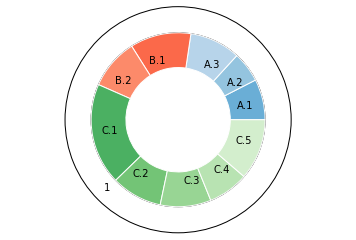

In [259]:
# Libraries
import matplotlib.pyplot as plt
 
# Make data: I have 3 groups and 7 subgroups
group_names=['1']
group_size=[120]
subgroup_names=['A.1', 'A.2', 'A.3', 'B.1', 'B.2', 'C.1', 'C.2', 'C.3', 'C.4', 'C.5']
subgroup_size=[4,3,5,6,5,10,5,5,4,6]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, labeldistance=0.85,startangle=45, colors=['none'] )
plt.setp( mypie, width=0.3, edgecolor='black')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()